# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Your code here
boston = pd.read_csv('../data/boston_data.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [10]:
null_cols = boston.isnull().sum()
null_cols[null_cols > 0]

Series([], dtype: int64)

In [12]:
stats = boston.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
crim,404.0,3.730912,8.943922,0.00632,0.082382,0.253715,4.053158,88.9762,3.970775
zn,404.0,10.509901,22.053733,0.00000,0.000000,0.000000,12.500000,95.0000,12.500000
indus,404.0,11.189901,6.814909,0.46000,5.190000,9.795000,18.100000,27.7400,12.910000
chas,404.0,0.069307,0.254290,0.00000,0.000000,0.000000,0.000000,1.0000,0.000000
nox,404.0,0.556710,0.117321,0.39200,0.453000,0.538000,0.631000,0.8710,0.178000
rm,404.0,6.301450,0.675830,3.56100,5.902750,6.230500,6.629250,8.7800,0.726500
age,404.0,68.601733,28.066143,2.90000,45.800000,76.600000,94.150000,100.0000,48.350000
dis,404.0,3.799666,2.109916,1.16910,2.087875,3.207450,5.222125,12.1265,3.134250
rad,404.0,9.836634,8.834741,1.00000,4.000000,5.000000,24.000000,24.0000,20.000000
tax,404.0,411.688119,171.073553,187.00000,281.000000,330.000000,666.000000,711.0000,385.000000


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [16]:
# Your plots here
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940,-0.400956
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075,0.355608
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061,0.141400
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025,0.683541
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001,-0.390863
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912,0.264876
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279,-0.423508
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792


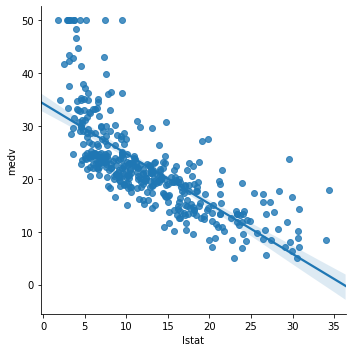

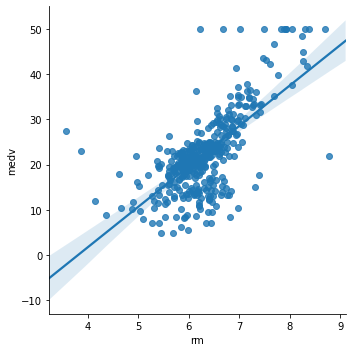

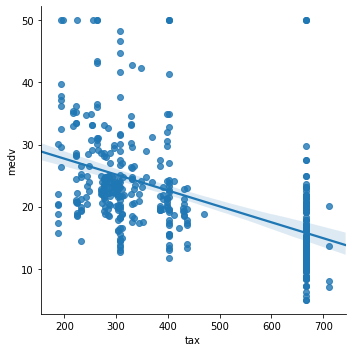

In [20]:
boston_corr = boston[['medv', 'lstat', 'rm', 'tax']]


sns.lmplot(x='lstat',y='medv', data=boston_corr ,fit_reg=True)
sns.lmplot(x='rm',y='medv', data=boston_corr ,fit_reg=True )
sns.lmplot(x='tax',y='medv', data=boston_corr ,fit_reg=True )

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
'''
I was expeting a biggest correlation with the tax rate until I found out that is the tax per 10000 euro, and so not the price of the house
'''

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [22]:
# Your response here

plt.imshow(boston, cmap='hot', interpolation='nearest')
plt.show()

NameError: name 'plt' is not defined

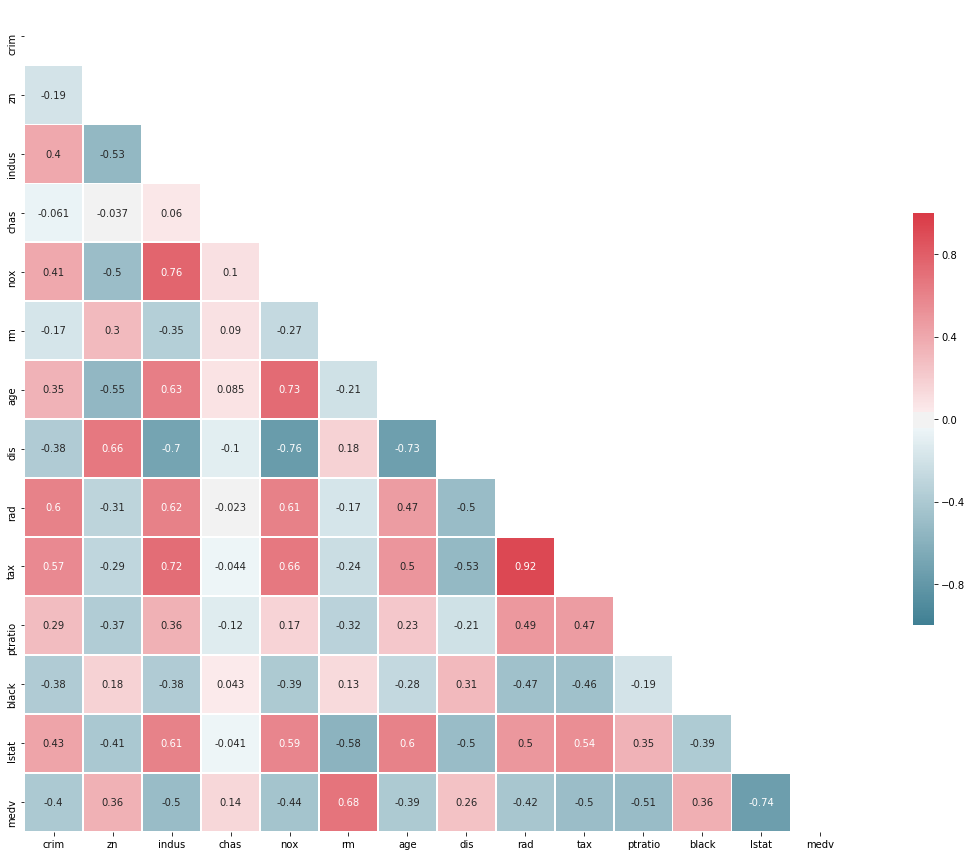

In [26]:
# Compute the correlation matrix
corr = boston.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.tight_layout()
plt.show() # ta-da!

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [27]:
# Your code here
stats = boston["medv"].describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
IQR        7.900000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [63]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    r2 = r2_score(y_true,y_predict)
    return r2

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [38]:
# Your code here
from sklearn.model_selection import train_test_split

# Your code here:

X=boston[boston.columns.difference(["medv"])]
y=boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)




In [ ]:

rf = RandomForestRegressor(max_depth=2)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_train)
score_2 = rf.r2_score(y_train, y_pred)
train_score.append(score_2)


rf = RandomForestRegressor(max_depth=4)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_train)
score_4 = rf.r2_score(y_train, y_pred)
train_score.append(score_4)

rf = RandomForestRegressor(max_depth=6)
rf.fit(X_train, y_train)
y_pred3 = rf.predict(X_train)
score_6 = rf.r2_score(y_train, y_pred)
train_score.append(score_6)


rf = RandomForestRegressor(max_depth=8)
rf.fit(X_train, y_train)
y_pred4 = rf.predict(X_train)
score_8 = rf.r2_score(y_train, y_pred)
train_score.append(score_8)

r5 = RandomForestRegressor(max_depth=10)
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_train)
score_10 = rf.r2_score(y_train, y_pred)
train_score.append(score_10)


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [65]:
from sklearn.ensemble import RandomForestRegressor


train_score = []

depth = [2,4,6,8,10]


for x in depth:
    rf = RandomForestRegressor(max_depth=x)
    rf.fit(X_train, y_train)
    y_pred= rf.predict(X_train)
    score = r2_score(y_train, y_pred)
    train_score.append(score)

    
test_score = []
    
for x in depth:
    rf = RandomForestRegressor(max_depth=x)
    rf.fit(X_train, y_train)
    y_pred= rf.predict(X_test)
    score = r2_score(y_test, y_pred)
    test_score.append(score)

/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/alessandro/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/a

Now, plot the score for each tree on the training set and on the testing set.

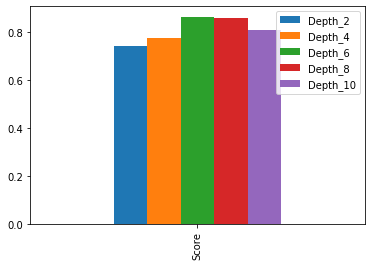

In [67]:

df_score = pd.DataFrame(test_score, index =['Depth_2', 'Depth_4', 'Depth_6', 'Depth_8', 'Depth_10'], columns =['Score'])
df_score = df_score.transpose()
df_score.plot.bar()

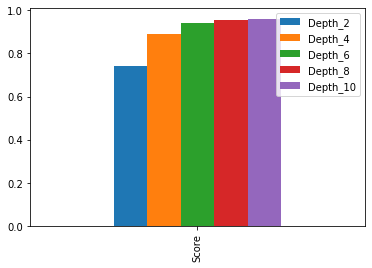

In [69]:

df_score = pd.DataFrame(train_score, index =['Depth_2', 'Depth_4', 'Depth_6', 'Depth_8', 'Depth_10'], columns =['Score'])
df_score = df_score.transpose()
df_score.plot.bar()

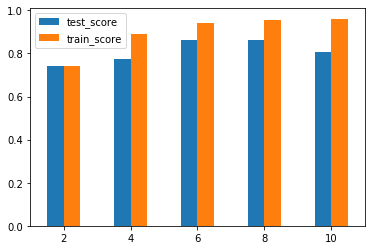

In [70]:
df = pd.DataFrame({'test_score': test_score, 'train_score': train_score}, index=depth)
ax = df.plot.bar(rot=0)

In [ ]:
# Your response here
'''
we can see that the test are higher than the preduction and the the bigger the depth the best is our r2_score

'''

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
#maxdepth=1: high bias, low variance
#maxdepth=10_ low bias, high variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [72]:
# Your response here
#I would say the optimum lies where score-train and score_test have almost the same r^2 score. As while on the one 
#hand r^2 score of the training data must be slightly higher, while on the other hand it shouldn't be too high
#compared to the test_set due to overfitting
#thus, my answer would be 7

rf = RandomForestRegressor(n_estimators=100, max_depth=7)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
score_train_n = r2_score(y_train, y_train_pred)

rf = RandomForestRegressor(n_estimators=100, max_depth=7)
rf.fit(X_test, y_test)
y_test_pred = rf.predict(X_test)
score_test_n = r2_score(y_test, y_test_pred)

In [73]:
print(score_train_n, score_test_n)

0.9589359149097881 0.9761446283919785


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
# the data is almost not relevant anymore. From a look at the codebook we can see that medv shall stand for 
# the price in thousands which is these days way higher.
#also the location might be due to better transport systems nowadays less relevant. Many socio-economic factors 
#have changed that influence the effect that feature have on the housing price 